# <center>Create & populate Employee Info Table</center>
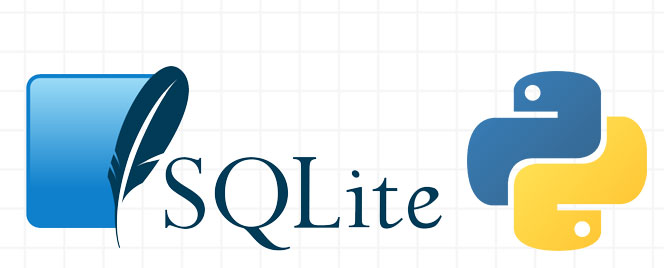

> virtualenv venv

> source venv/bin/activate

Load some packages

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
from pandasql import sqldf
print(sqlite3.version)
print(sqlite3.sqlite_version)

Connect to the database

In [ ]:
dbconn = sqlite3.connect('FakeHR.db') # permanent database

In [ ]:
print(dbconn) # Check the connection to the database.

Create a cursor to use to execute SQL statements.

In [ ]:
cursor = dbconn.cursor()

In [ ]:
cursor # Check that the cursor is created.

Load the existing baseline table from the database

In [ ]:
basedf = pd.read_sql_query('select * FROM SCOPE_EMP', dbconn)
basedf.head(5)

In [ ]:
basedf.shape

Load in the new employees data

In [ ]:
file = r'/home/chuck/Projects/jobian-ai/FakeHR/DATA/my_random_people.csv'

In [ ]:
df = pd.read_csv(file)
df.head(5)

Renaming some columns

In [ ]:
df = df.rename(columns={"last_name":"LNAME", "first_name":"FNAME","on_board_date":"OBD","LoA":"LOA"})
df.head(5)

In [ ]:
df.columns = df.columns.str.upper()
df.columns = df.columns.str.replace(' ','_')
df.head(5)

Converting the OBD (On Board Date) field.

In [ ]:
df['OBD']= pd.to_datetime(df['OBD']) # This line converts the string 'date' to a real datetime
df['OBD']= df['OBD'].dt.date # This line strips the time data off and leave just a date
df.head(5)

In [ ]:
df["ECI"] = pd.to_numeric(df["ECI"]) # wanted to convert this for sorting purposes.

In [ ]:
df.dtypes

Dropping some columns for this test

In [ ]:
to_drop = ['ID',
'FSSN']

In [ ]:
df.drop(to_drop, inplace=True, axis=1)
df.head(5)

At first I created the table below to test some SQL to find dupes

In [ ]:
# df.to_sql('temp_EMP_INFO', con = dbconn, if_exists='append', index=False)

Checking for the uniqueness of the ECI and SSN fields for my FakeHR DB

In [ ]:
# df['FSSN'].is_unique
df['ECI'].is_unique # ECI number was not unique in this first test
# basedf['ECI'].is_unique

In [ ]:
globals()['df']

Select statement to find duplicate ECI's

In [ ]:
# q= 'SELECT d.ECI, d.FULL_NAME, b.ECI FROM df d INNER JOIN basedf b ON d.ECI WHERE d.ECI = b.ECI;'
#q = 'SELECT b.ITP_id, b.ECI, b.FULL_NAME, d.ECI FROM basedf b INNER JOIN df d ON b.ECI WHERE b.ECI = d.ECI;'
q='SELECT t1.ROWID,t1.FULL_NAME, t1.ECI, t2.ITP_id FROM df t1 LEFT JOIN basedf t2 ON t2.FULL_NAME = t1.FULL_NAME WHERE t2.FULL_NAME IS NULL;'

In [ ]:
sqldf(q, globals())

In [ ]:
df.loc[782]

In [ ]:
df.shape

I wanted to delete the rows manually that were ECI dupes, AND not already in the SCOPE_EMP table

In [ ]:
# Can search for the exact row ID form the query result.
df.loc[882]

In [ ]:
df.drop([782,882,953,965], axis=0, inplace=True)

In [ ]:
df.head(3)

In [ ]:
df.dtypes

### Creating the table to enforce UNIQUE values

In [ ]:
cursor.execute('''CREATE TABLE IF NOT EXISTS EMP_INFO(ECI INTEGER NOT NULL PRIMARY KEY ON CONFLICT REPLACE,
    LNAME NVARCHAR NOT NULL,
    FNAME NVARCHAR NOT NULL,
    MI NVARCHAR,
    SF NVARCHAR,
    FULL_NAME NVARCHAR NOT NULL,
    OBD DATE,
    LOA INTEGER)
    ''')
dbconn.commit()

In [ ]:
df.to_sql('EMP_INFO', con = dbconn, if_exists='append', index=False)

___
## <CENTER> I STOPPED HERE TODAY </CENTER>

Wanted the dataframe sorted by ECI for aestetics.
When inserted into the table, lower ECI's will appear first.

In [ ]:
df.sort_values(by=['ECI'])

In [ ]:
# df = df.reset_index(drop=True)
df = df.sort_values(by=['ECI'],ignore_index=True)
df.head(5)

Below will fail if values of ECI and SSN or not unique

In [ ]:
df.to_sql('SCOPE_EMP', con = dbconn, if_exists='append', index=False)

___
### <CENTER>STOP HERE!</CENTER>

In [ ]:
qry='SELECT FULL_NAME, ECI FROM temp_EMP_INFO WHERE ECI IN (SELECT ECI FROM temp_EMP_INFO GROUP BY ECI HAVING COUNT(*) > 1);`

In [ ]:
# This is just here to drop the table for testing.
cursor = dbconn.cursor()
cursor.execute('''DROP TABLE SCOPE_EMP''')
dbconn.commit()

## Deleting unwated DataFrames

In [ ]:
# del empDF 
# del newcolDF 
# del upempDF
# del result

In [ ]:
cursor.close()
dbconn.close()

In [ ]:
booksdf = cursor.execute('''select * from books;''').fetchall()

## Create dataframe from SQL query

In [ ]:
df2 = pd.read_sql_query('select * FROM SCOPE_EMP', dbconn)
df2.head(5)


In [ ]:
df2.shape